In [1]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

# Load sessions

In [2]:
ID = 148
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

#148 run on antibiasR, R is correct, L is incorrect

In [3]:
sessions = log[(log.AnimalNum == 148)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasR = sessions[(sessions.SessionType == 'antibiasR')]
sessions = (pd.concat([unbiased,antibiasR])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions


    AnimalNum  SessionNum SessionType
13        148          56    unbiased
14        148          60    unbiased
15        148          71   antibiasR
16        148          75   antibiasR
17        148          79   antibiasR
18        148          83    unbiased
19        148          86    unbiased


In [4]:
summary = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals]

In [5]:
mean_trials = np.mean([(len(x))for x in summary])

In [6]:
unbiased_idx = [0,1,5,6]
antibias_idx = [2,3,4]
len(summary[0])

64

In [7]:
summary = [mvr.correctL(x) for x in summary]

# Create dot plot

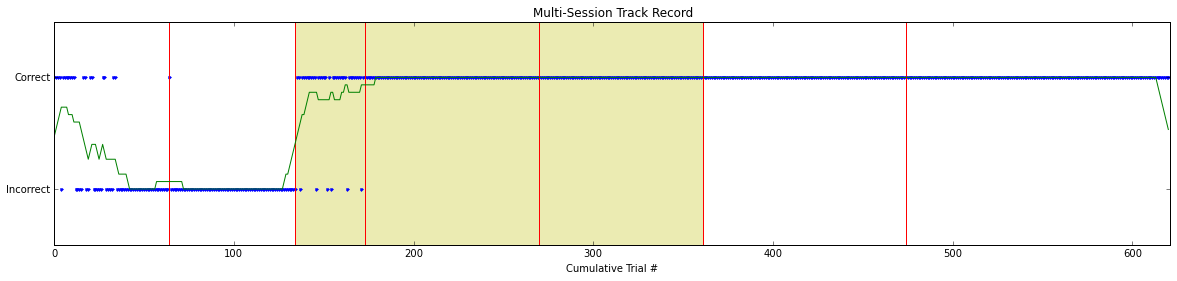

In [9]:

plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 

640 640


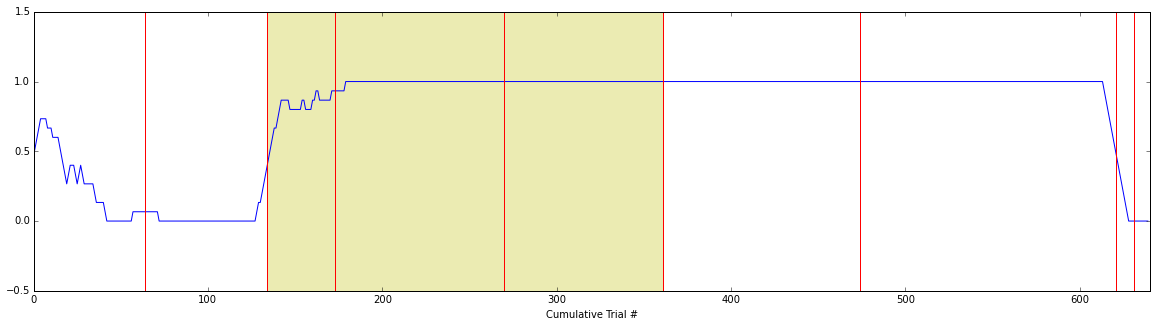

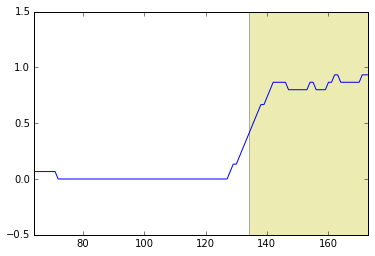

In [34]:
#Moving Average-Main Behavior
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
#for i in range(len(dot_array)):
#    avgs.append(np.mean(dot_array[i:i+binsize]))
print len(avgs), len(dot_array)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(len_array[0],len_array[2])
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)

zoom = avgs[len_array[1]-40:len_array[1]+40]
zoom  = pd.Series(zoom)
zoom.to_csv(path + "/rollingavg148.csv")


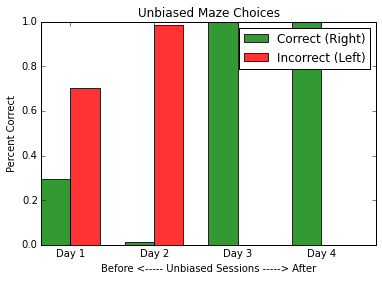

In [11]:
#Plot Unbiased Correct (R correct, L incorrect)
c = [] #correct/right
for j in unbiased_idx:
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/left side

labels = ('Day 1', 'Day 2', 'Day 3', 'Day 4')  #Unbiased days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Right)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Left)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('Before <----- Unbiased Sessions -----> After')
plt.ylabel('Percent Correct')
plt.title('Unbiased Maze Choices')
plt.show()
plt.savefig(path+'/unbiased148')

# Plot Animal performance

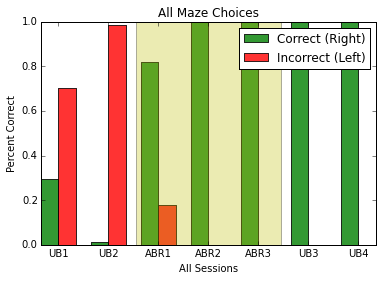

0.155580357143 0.940170940171 1.0


In [13]:
#Plot Unbiased Correct (R correct, L incorrect)
c = [] #correct/right
for j in range(7):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/left side

labels = ['UB1', 'UB2', 'ABR1', 'ABR2', 'ABR3', 'UB3', 'UB4']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Right)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Left)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.show()

plt.savefig(path+'/allsessions148.png')

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:5])
mu_perc_corrUB_after = np.mean(c[5:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after

# Time stats

[19.131781249999996, 17.532685714285712, 30.937179487179492, 12.642742268041243, 13.28061538461539, 10.677238938053097, 10.068108843537415]


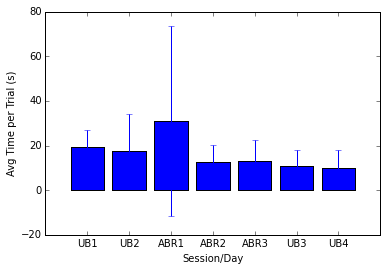

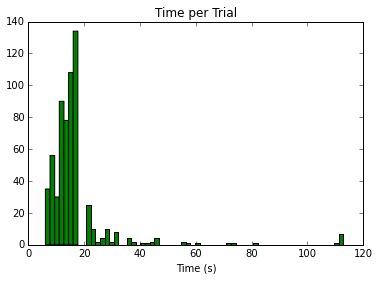

In [14]:
#Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)
labels = ['UB1', 'UB2', 'ABR1', 'ABR2', 'ABR3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
t,t1= [],[]
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')

            

[5.02390625, 2.0980571428571424, 2.5301025641025645, 1.916474226804124, 1.5962197802197808, 1.3470973451327435, 1.133265306122449]
[5.44624314294026, 1.087435433841627, 1.4077534883425507, 0.7782504295531459, 0.8602587440505948, 0.4536720016511647, 0.6433089154033276]


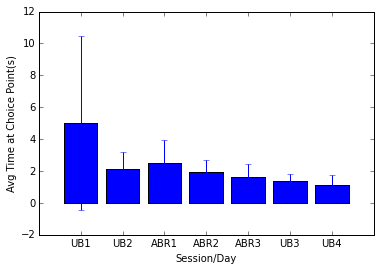

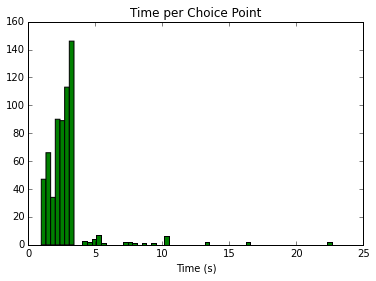

In [15]:
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'UB2', 'ABR1', 'ABR2', 'ABR3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            

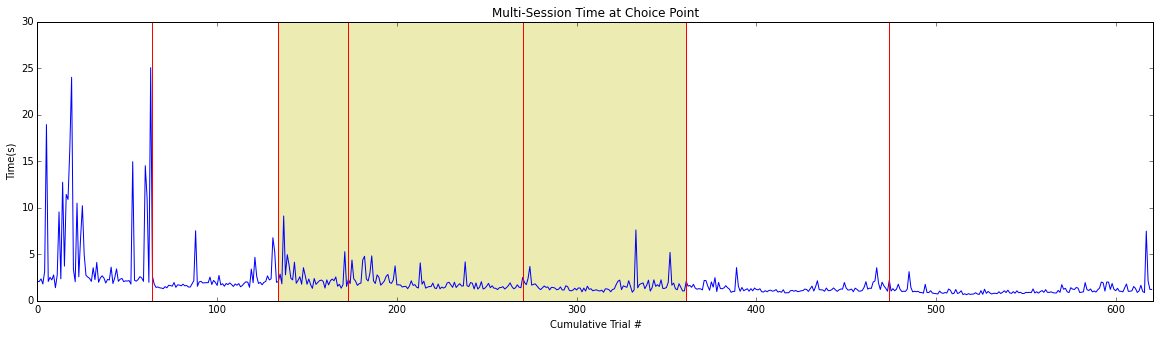

In [16]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
#plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
#plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Time at Choice Point')

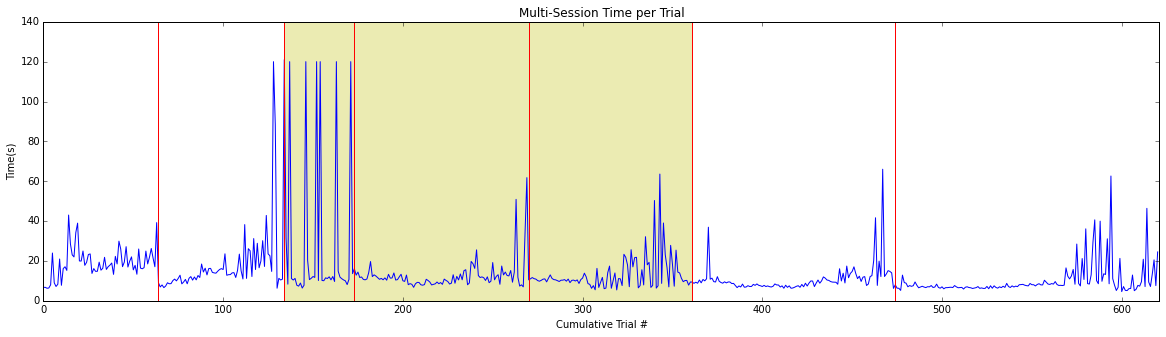

In [17]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
#plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')

plt.title('Multi-Session Time per Trial')

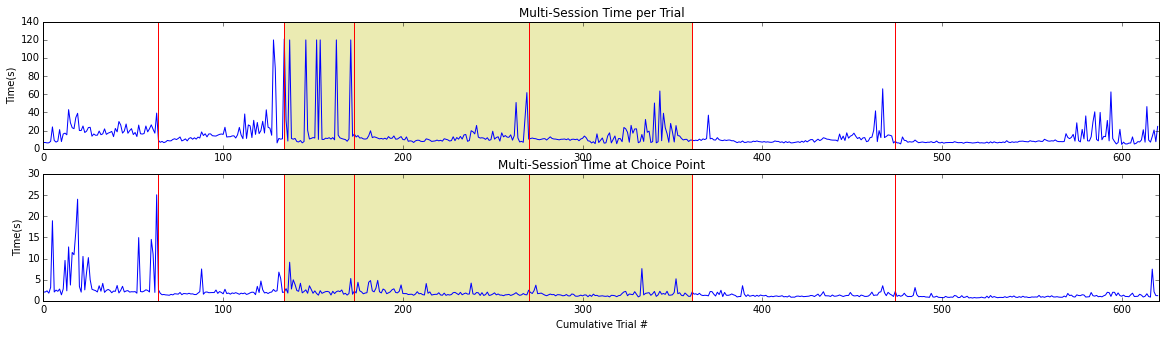

In [18]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


8


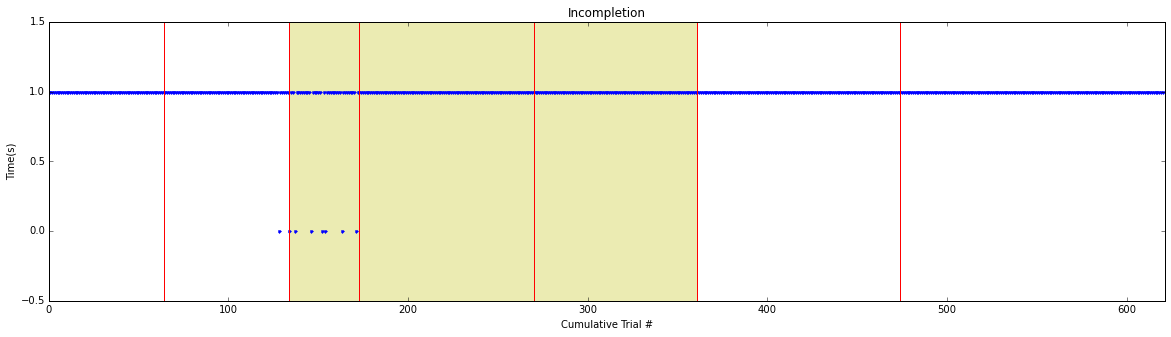

In [19]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Incompletion')
num_incomplete = completion.count(0)
print num_incomplete


In [20]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)
    
print num_deadend

7


In [21]:
#Summary vals for all of an animal's sessions
animal_summary = {'Animal' :148,
                  'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoice': np.nanmean(tchoice_array),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctAfter' : mu_perc_corrUB_after}

In [22]:
animal_summary = pd.Series(animal_summary)


In [23]:
#animal_summary = pd.DataFrame.from_dict(animal_summary,orient = 'index')

In [24]:
animal_summary.to_csv( path + "/animalsummary148.csv")

In [25]:
animal_summary


Animal             148.000000
correctAfter         1.000000
correctAntibias      0.940171
correctBefore        0.155580
incomplete           8.000000
meanChoice           1.959797
meanNumTrials       88.714286
meanTime            14.137994
numDays              7.000000
totalDeadEnd         7.000000
dtype: float64

# Add pro-bias session analysis

In [26]:
logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_extraswitch_log.xlsx'
extralog = pd.read_excel(logpath)
extralog

extra_sessions = extralog[(extralog.AnimalNum == 148)]
antibiasL = extra_sessions[(extra_sessions.SessionType == 'antibiasL')]
sessions = (pd.concat([unbiased,antibiasR,antibiasL])).sort(columns = 'SessionNum')
session_vals= [int(x) for x in sessions.SessionNum]
print sessions
print session_vals

    AnimalNum  SessionNum SessionType
13        148          56    unbiased
14        148          60    unbiased
15        148          71   antibiasR
16        148          75   antibiasR
17        148          79   antibiasR
18        148          83    unbiased
19        148          86    unbiased
0         148          93   antibiasL
1         148          94   antibiasL
[56, 60, 71, 75, 79, 83, 86, 93, 94]


In [27]:
summary_extra = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals[-2:]]

summary_extra = [mvr.correctR(x) for x in summary_extra]
summary+=summary_extra

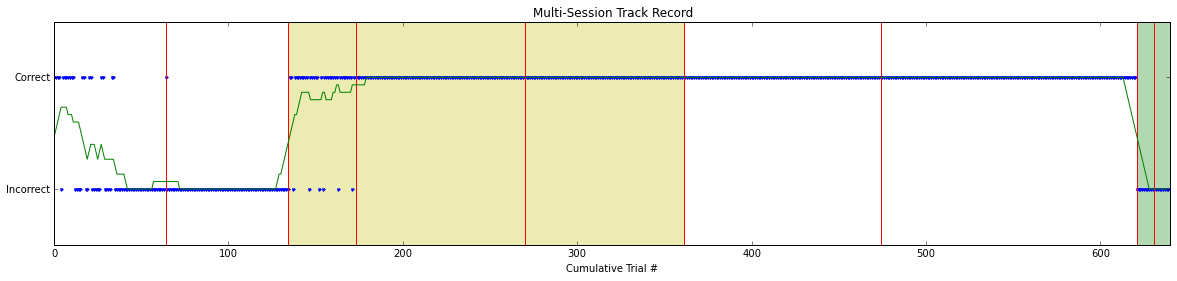

In [28]:

#Plot Correct Track Record acros all sessions (main behavior)
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[6],len_array[8], facecolor = 'g', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 